In [18]:
using Revise
using LinearAlgebra
using AdaptiveTransportMap
using Statistics
using Distributions
using Test
using ForwardDiff
using SpecialFunctions
using OrthoMatchingPursuit
using BenchmarkTools

┌ Info: Precompiling AdaptiveTransportMap [bdf749b0-1400-4207-80d3-e689c0e3f03d]
└ @ Base loading.jl:1278
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been

In [55]:
using Plots
default(tickfont = font("CMU Serif", 9), 
        titlefont = font("CMU Serif", 14), 
        guidefont = font("CMU Serif", 12),
        legendfont = font("CMU Serif", 10),
        grid = false)
# pyplot()

using LaTeXStrings

In [19]:
Nx = 4
Ne = 8

A = randn(Ne,Nx)

8×4 Array{Float64,2}:
 -1.17581     0.673655  -0.822761   0.2219
 -0.530686    0.536954   0.71771   -0.0397807
  1.09728     0.277478  -0.139536   0.356164
 -0.535629    0.625089   0.746079   1.19098
 -1.10119     0.815852  -1.29168   -2.67975
 -0.0386057   0.399658  -1.03669    1.2296
 -0.268875   -1.12397    1.78927   -1.51127
 -1.77564     0.727456  -0.637915   0.28906

In [20]:
μA = mean(A; dims = 1)[1,:]

σA = std(A; dims = 1)[1,:]
DA = Diagonal(σA)



4×4 Diagonal{Float64,Array{Float64,1}}:
 0.866163   ⋅         ⋅        ⋅ 
  ⋅        0.627123   ⋅        ⋅ 
  ⋅         ⋅        1.07323   ⋅ 
  ⋅         ⋅         ⋅       1.33873

In [21]:
onevec = ones(Ne);

A'*(1/Ne*onevec)-μA

4-element Array{Float64,1}:
 -1.1102230246251565e-16
  0.0
  1.3877787807814457e-17
 -5.551115123125783e-17

In [22]:
((1/Ne)*onevec'*A)'

4-element Array{Float64,1}:
 -0.5411434110162578
  0.366522003633715
 -0.08444091767284598
 -0.1178865208032554

In [23]:
Ā = ((I - (1/Ne)*onevec*onevec')*A)*inv(DA)

8×4 Array{Float64,2}:
 -0.73273      0.489748   -0.687945    0.253812
  0.0120737    0.271769    0.747421    0.0583432
  1.89159     -0.141988   -0.0513357   0.354104
  0.00636591   0.412306    0.773854    0.977694
 -0.646578     0.716493   -1.12487    -1.91365
  0.580189     0.0528384  -0.887276    1.00654
  0.314338    -2.37671     1.74587    -1.04082
 -1.42525      0.575539   -0.515711    0.303979

In [24]:
mean(Ā; dims = 1)[1,:]

4-element Array{Float64,1}:
  0.0
  1.3877787807814457e-17
  0.0
 -2.0816681711721685e-17

In [25]:
std(Ā; dims = 1)[1,:]

4-element Array{Float64,1}:
 0.9999999999999998
 1.0
 1.0
 1.0

In [112]:
Nx = 10
Ne = 1000

Σ = SymTridiagonal(rand(Nx), 0.05*rand(Nx-1))
@assert isposdef(Symmetric(Matrix(Σ))) "Σ is not positive definite"
Lx = cholesky(Symmetric(inv(Σ))).L
πX = MvNormal(zeros(Nx), Symmetric(Σ))
X = rand(πX, Ne)
Xvalid = rand(πX, Ne)
λ = 0.0
δ = 1e-8
γ = 2.0

2.0

In [113]:
@time S = SparseRadialMap(Nx, -1; γ = γ, λ = λ, δ = δ)

  0.000023 seconds (303 allocations: 25.547 KiB)


Sparse Radial Map of dimension Nx = 10 and order p = [[-1], [-1, -1], [-1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]
        with parameters (γ, λ, δ, κ) = (2.0, 0.0, 1.0e-8, 10.0)


In [114]:
optimize(S, X, 0, 0, "kfolds"; verbose = true)

Fold 1:
1 active dimensions  - Training error: -1.3357683266430171, Validation error: -1.3635063591667897
Fold 2:
1 active dimensions  - Training error: -1.3245861715399863, Validation error: -1.406821561082123
Fold 3:
1 active dimensions  - Training error: -1.3524155183878594, Validation error: -1.2958584316649717
Fold 4:
1 active dimensions  - Training error: -1.3424879860045962, Validation error: -1.3368016768811297
Fold 5:
1 active dimensions  - Training error: -1.3522996545885035, Validation error: -1.2966414755362792
Optimization on the entire data set:
1 active dimensions  - Training error: -1.341352937445296
Fold 1:
1 active dimensions  - Training error: 0.012042940856321956, Validation error: 0.08357488714045985
2 active dimensions  - Training error: -0.11405728447783348, Validation error: -0.04245338809672857
Fold 2:
1 active dimensions  - Training error: 0.013745284989913375, Validation error: 0.0763083650392036
2 active dimensions  - Training error: -0.1095667176202114, Val

2 active dimensions  - Training error: 0.4049423905152025, Validation error: 0.3911435462455179
3 active dimensions  - Training error: 0.4030898356215857, Validation error: 0.3935444034139887
4 active dimensions  - Training error: 0.39966680521649783, Validation error: 0.39762335304589164
5 active dimensions  - Training error: 0.39806152698127995, Validation error: 0.39448597040490674
6 active dimensions  - Training error: 0.3980558099540303, Validation error: 0.3947455106524578
Fold 5:
1 active dimensions  - Training error: 0.39251243524842017, Validation error: 0.4514604341423923
2 active dimensions  - Training error: 0.3896983667575568, Validation error: 0.45302148358605543
3 active dimensions  - Training error: 0.38877011906816955, Validation error: 0.4510390675644324
4 active dimensions  - Training error: 0.3872285209687902, Validation error: 0.44695074065903134
5 active dimensions  - Training error: 0.3851295455316403, Validation error: 0.4454771096857742
6 active dimensions  - T

5 active dimensions  - Training error: -0.9940818050552451, Validation error: -0.9602411862983756
6 active dimensions  - Training error: -0.9949869879113777, Validation error: -0.961391921440161
7 active dimensions  - Training error: -0.9951166225545987, Validation error: -0.9600719622980883
8 active dimensions  - Training error: -0.9951198752685296, Validation error: -0.9600778385706328
9 active dimensions  - Training error: -0.9954958710356302, Validation error: -0.9586352928074139
Fold 3:
1 active dimensions  - Training error: -0.9728528133778536, Validation error: -0.9363014311466994
2 active dimensions  - Training error: -0.9731866220978517, Validation error: -0.9339477850676275
3 active dimensions  - Training error: -0.992765464657355, Validation error: -0.9441473927497733
4 active dimensions  - Training error: -0.9946849518288873, Validation error: -0.9533795295110887
5 active dimensions  - Training error: -0.995097049554601, Validation error: -0.9549680880836959
6 active dimens

Sparse Radial Map of dimension Nx = 10 and order p = [[0], [0, 0], [0, 0, 0], [-1, 0, 0, 0], [-1, -1, -1, 0, 0], [-1, 0, 0, 0, 0, 0], [-1, -1, -1, -1, -1, -1, 0], [-1, -1, -1, -1, -1, -1, -1, 0], [-1, 0, -1, -1, -1, 0, 0, 0, 0], [-1, -1, -1, -1, -1, -1, -1, -1, -1, 0]]
        with parameters (γ, λ, δ, κ) = (2.0, 0.0, 1.0e-8, 10.0)


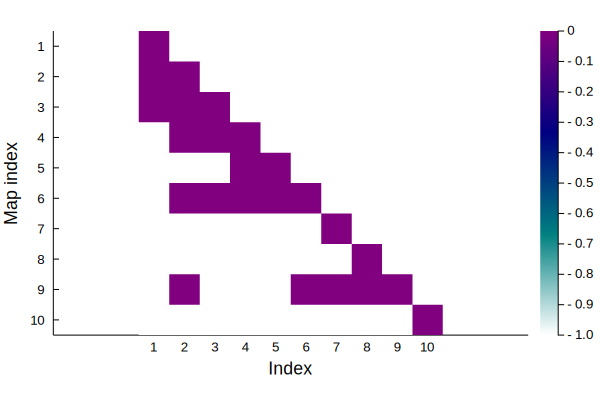

In [115]:
plot(S)

In [116]:
@time S, _ = optimize(S, X, 2, 0, "kfolds"; verbose = true)

Fold 1:
1 active dimensions  - Training error: -1.3357683266430171, Validation error: -1.3635063591667897
Fold 2:
1 active dimensions  - Training error: -1.3245861715399863, Validation error: -1.406821561082123
Fold 3:
1 active dimensions  - Training error: -1.3524155183878594, Validation error: -1.2958584316649717
Fold 4:
1 active dimensions  - Training error: -1.3424879860045962, Validation error: -1.3368016768811297
Fold 5:
1 active dimensions  - Training error: -1.3522996545885035, Validation error: -1.2966414755362792
Optimization on the entire data set:
1 active dimensions  - Training error: -1.341352937445296
Fold 1:
1 active dimensions  - Training error: 0.012042940856321956, Validation error: 0.08357488714045985
2 active dimensions  - Training error: -0.11407538687213163, Validation error: -0.04292348729196787
Fold 2:
1 active dimensions  - Training error: 0.013745284989913375, Validation error: 0.0763083650392036
2 active dimensions  - Training error: -0.11010412782178312, Va

7 active dimensions  - Training error: 0.15660542682557893, Validation error: 0.20510637019441919
Fold 3:
1 active dimensions  - Training error: 0.1755733249767105, Validation error: 0.14211056541029918
2 active dimensions  - Training error: 0.17544799632947983, Validation error: 0.1415429324329056
3 active dimensions  - Training error: 0.172858017666158, Validation error: 0.15344757977932696
4 active dimensions  - Training error: 0.17013168839055345, Validation error: 0.15690277003088648
5 active dimensions  - Training error: 0.16995733949748762, Validation error: 0.1602984719028351
6 active dimensions  - Training error: 0.16853621166144592, Validation error: 0.15700451445423977
7 active dimensions  - Training error: 0.16798164418628417, Validation error: 0.16092267843935004
Fold 4:
1 active dimensions  - Training error: 0.16674019438188617, Validation error: 0.17824546085009693
2 active dimensions  - Training error: 0.16550436487835873, Validation error: 0.17924108286986554
3 active 

8 active dimensions  - Training error: -0.9953920686297132, Validation error: -0.9617248780876243
9 active dimensions  - Training error: -0.996113409797206, Validation error: -0.9581766185431652
Fold 5:
1 active dimensions  - Training error: -0.9727753597108668, Validation error: -0.9381739297176874
2 active dimensions  - Training error: -0.9767808194819009, Validation error: -0.9328685878980062
3 active dimensions  - Training error: -0.9902931322648093, Validation error: -0.9663993558843931
4 active dimensions  - Training error: -0.9925007018336743, Validation error: -0.9691403299210292
5 active dimensions  - Training error: -0.9937931258396114, Validation error: -0.9677869253579852
6 active dimensions  - Training error: -0.9943818748620175, Validation error: -0.970007534178401
7 active dimensions  - Training error: -0.9950876711681501, Validation error: -0.9683486774339194
8 active dimensions  - Training error: -0.9955010616326952, Validation error: -0.968085465183903
9 active dimens

LoadError: [91mMethodError: no method matching iterate(::SparseRadialMap)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  iterate([91m::ThreadPools.QueuePool[39m) at /home/mat/.julia/packages/ThreadPools/P1NVV/src/qpool.jl:123[39m
[91m[0m  iterate([91m::ThreadPools.QueuePool[39m, [91m::Any[39m) at /home/mat/.julia/packages/ThreadPools/P1NVV/src/qpool.jl:123[39m
[91m[0m  iterate([91m::Base.EnvDict[39m) at env.jl:119[39m
[91m[0m  ...[39m

In [47]:
S.coeff

10-element Array{Array{Float64,1},1}:
 []
 []
 []
 []
 []
 []
 []
 []
 [-0.2756283481138772, -3.0962064108883283, 2.9735315209368944]
 [0.07441535268685531, 3.441568928814753]

In [29]:
AdaptiveTransportMap.component(S,4)

ui(-1, Float64[], Float64[], Float64[])

In [29]:
Cgreedy = SparseRadialMapComponent(Nx, -1)
@time Cgreedy, ϵ = optimize(Cgreedy, X, 1, 0, "kfolds", λ, δ, γ; verbose = false)

  0.024131 seconds (480.29 k allocations: 44.274 MiB)


(Sparse radial map component of dimension 5 and order p = [-1, -1, -1, -1, 0]
, [-0.028762879099387236])

In [83]:
@time ForwardDiff.derivative(z-> Cgreedy(vcat(x[1:4], z)), x[5])

  0.272118 seconds (732.85 k allocations: 39.022 MiB, 4.35% gc time)


1.806181259414845

In [86]:
@time ForwardDiff.hessian(z-> Cgreedy(z), x)

  1.250680 seconds (4.98 M allocations: 242.098 MiB, 2.84% gc time)


5×5 Array{Float64,2}:
 0.0   0.0         0.0          0.0          0.0
 0.0  -0.0235844   0.0          0.0          0.0
 0.0   0.0        -0.00810138   0.0          0.0
 0.0   0.0         0.0         -8.58126e-13  0.0
 0.0   0.0         0.0          0.0          0.0